# 4.10 Instacart Final Task
## Content
### Libraries and Dataframes
### Regional segmentation of data
### Difference in spending habits between the different U.S. regions
### Exclusion flag for low-activity customers
### Customer profiling
### Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 4.2\21-01-25 Instacart Basket Analysis'

In [4]:
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

# Regional segmentation of the data

In [5]:
cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
#Assigning Northeast Region
cust_ords_prods.loc[cust_ords_prods['State'] == 'Maine', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'New Hampshire', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Vermont', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Pennsylvania', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Massachusetts', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Rhode Island', 'Region'] = 'Northeast'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Connecticut', 'Region'] = 'Northeast'

In [7]:
#Assigning Midwest Region
cust_ords_prods.loc[cust_ords_prods['State'] == 'Wisconsin', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Michigan', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Illinois', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Indiana', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Ohio', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'North Dakota', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'South Dakota', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Nebraska', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Kansas', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Minnesota', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Iowa', 'Region'] = 'Midwest'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Missouri', 'Region'] = 'Midwest'

In [8]:
#Assigning South Region
cust_ords_prods.loc[cust_ords_prods['State'] == 'Delaware', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Maryland', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'District of Columbia', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Virginia', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'West Virginia', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'North Carolina', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'South Carolina', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Georgia', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Florida', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Kentucky', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Tennessee', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Mississippi', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Alabama', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Oklahoma', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Texas', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Arkansas', 'Region'] = 'South'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Louisiana', 'Region'] = 'South'

In [9]:
#Assign West Region
cust_ords_prods.loc[cust_ords_prods['State'] == 'Idaho', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Montana', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Wyoming', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Nevada', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Utah', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Colorado', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Arizona', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'New Mexico', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Alaska', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Washington', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Oregon', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'California', 'Region'] = 'West'
cust_ords_prods.loc[cust_ords_prods['State'] == 'Hawaii', 'Region'] = 'West'

In [10]:
cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


### Difference in spending habits between the different U.S regions

In [11]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(cust_ords_prods['Region'], cust_ords_prods['spending_flag'], dropna = False)

In [12]:
crosstab.to_clipboard()

In [13]:
# save changes to customer_orders_products
cust_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_orders_products.pkl'))

# Exclusion flag for low-activity customers

In [14]:
# Create a flag for customers with less than 5 orders
cust_ords_prods.loc[cust_ords_prods['max_order'] < 5, 'Activity_flag'] = 'Low-activity customer'
cust_ords_prods.loc[cust_ords_prods['max_order'] >= 5, 'Activity_flag'] = 'High-activity customer'

In [15]:
cust_ords_prods['Activity_flag'].value_counts(dropna = False)

Activity_flag
High-activity customer    30964564
Low-activity customer      1440295
Name: count, dtype: int64

In [16]:
# Exclude low-activity customers from the dataframe
df_excluded = cust_ords_prods[cust_ords_prods['Activity_flag'] != 'low-activity customer']

In [17]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# Customer profiling

### Age

In [18]:
#Creating an age group variable
df_excluded.loc[df_excluded['Age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['Age'] > 25) & (df_excluded['Age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['Age'] > 44) & (df_excluded['Age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['Age'] > 64, 'age_group'] = 'senior'

In [19]:
#Checking value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    10139691
adult           9644895
senior          8575084
young adult     4045189
Name: count, dtype: int64

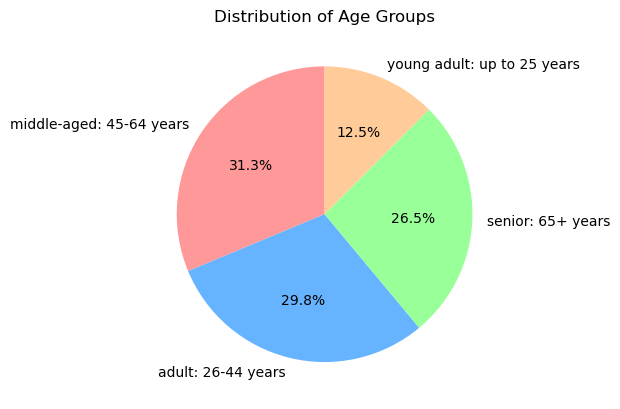

In [20]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [21]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

## Income

In [22]:
#Creating an income group variable
df_excluded.loc[df_excluded['Income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['Income'] > 55000) & (df_excluded['Income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['Income'] > 150000, 'income_group'] = 'high-income'

In [23]:
#Checking the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    23614034
low-income        4739985
high-income       4050840
Name: count, dtype: int64

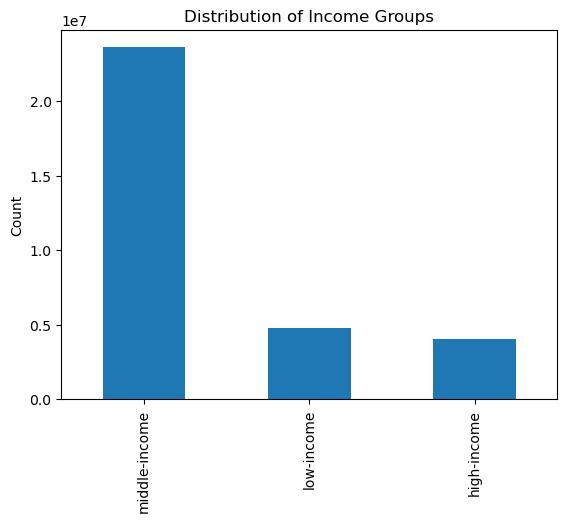

In [24]:
#Make a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [25]:
#Exporting the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

## Dependants

In [26]:
#Creating a dependents flag
df_excluded.loc[df_excluded['Number of Dependents'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['Number of Dependents'] >= 1, 'dependants_flag'] = 'has dependants'

In [27]:
#Checking value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    24307356
no dependants      8097503
Name: count, dtype: int64

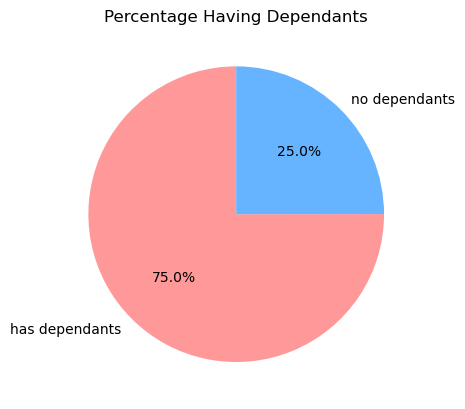

In [28]:
# Make a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [29]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

In [30]:
# import dataframe
df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

In [31]:
list(df_excluded.columns.values)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency_flag',
 'First Name',
 'Last Name',
 'Gender',
 'State',
 'Age',
 'Date Joined',
 'Number of Dependents',
 'Family Status',
 'Income',
 'Region',
 'Activity_flag',
 'age_group',
 'income_group',
 'dependants_flag']

## Loyalty vs Age Group

In [32]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048175,3231509,2723958,1280451
New customer,1850952,1956310,1656199,780529
Regular customer,4745768,4951872,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

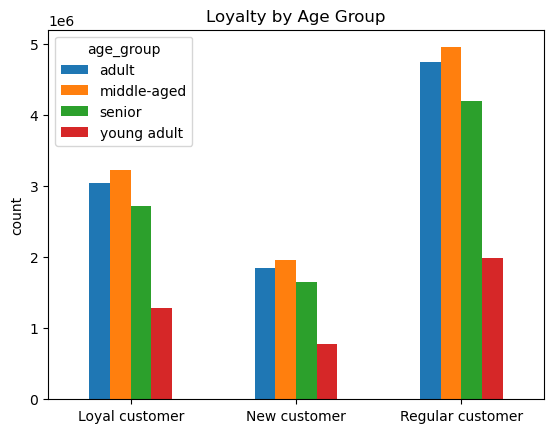

In [33]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [34]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

## Spending vs Age Group

In [35]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,183932,208345,163994,77974
Low spender,9460963,9931346,8411090,3967215


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

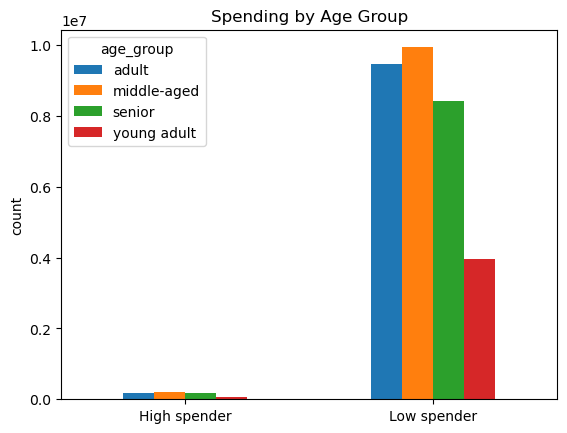

In [36]:
# bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [37]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

## Redo regional spending with low activity customers excluded

In [38]:
df_excluded.loc[df_excluded['State'] == 'Pennsylvania', 'Region'] = 'Northeast'

In [39]:
# Crosstab Region to spending flag
region_spending_cross = pd.crosstab(df_excluded['Region'], df_excluded['spending_flag'], dropna = False)

In [40]:
region_spending_cross

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,87501,4371560
South,209691,10582194
West,160354,8132559
NaN,20724,1242951


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West'),
  Text(4, 0, 'nan')])

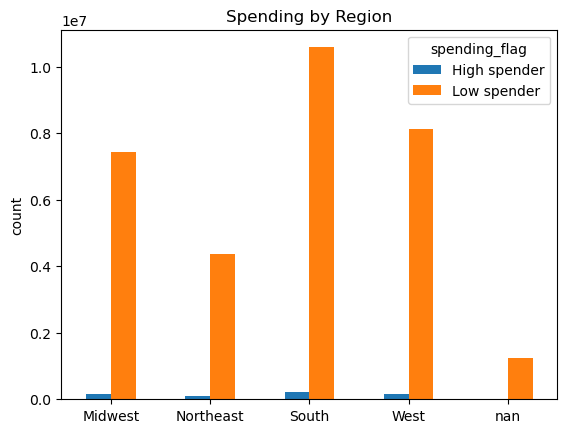

In [41]:
# bar chart
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [42]:
# Export the chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

## Orders by Department

In [43]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [44]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

In [51]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

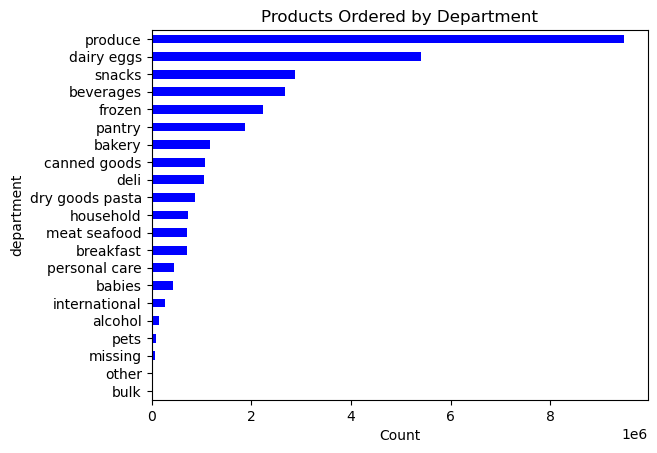

In [52]:
# bar chart frequency of orders vs department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [53]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

## Age vs Department

In [54]:
#crosstab age group vs department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,44890,127238,349788,789244,208477,10271,319096,1615921,313917,256969,...,219146,80649,209439,20381,10730,556843,132443,28324,2832448,860333
middle-aged,49359,134108,366692,850960,221198,10638,333034,1681753,329214,270914,...,230912,83793,220521,21671,11469,587752,141907,29811,2955476,905758
senior,39036,109445,309522,714832,183844,9242,282438,1426213,277618,228935,...,196935,70774,190114,18094,9425,496979,117405,26286,2513763,760515
young adult,20411,53011,146426,333087,89514,4422,133490,674860,130500,109809,...,91673,34037,88853,8999,4667,233795,55817,13295,1177604,360944


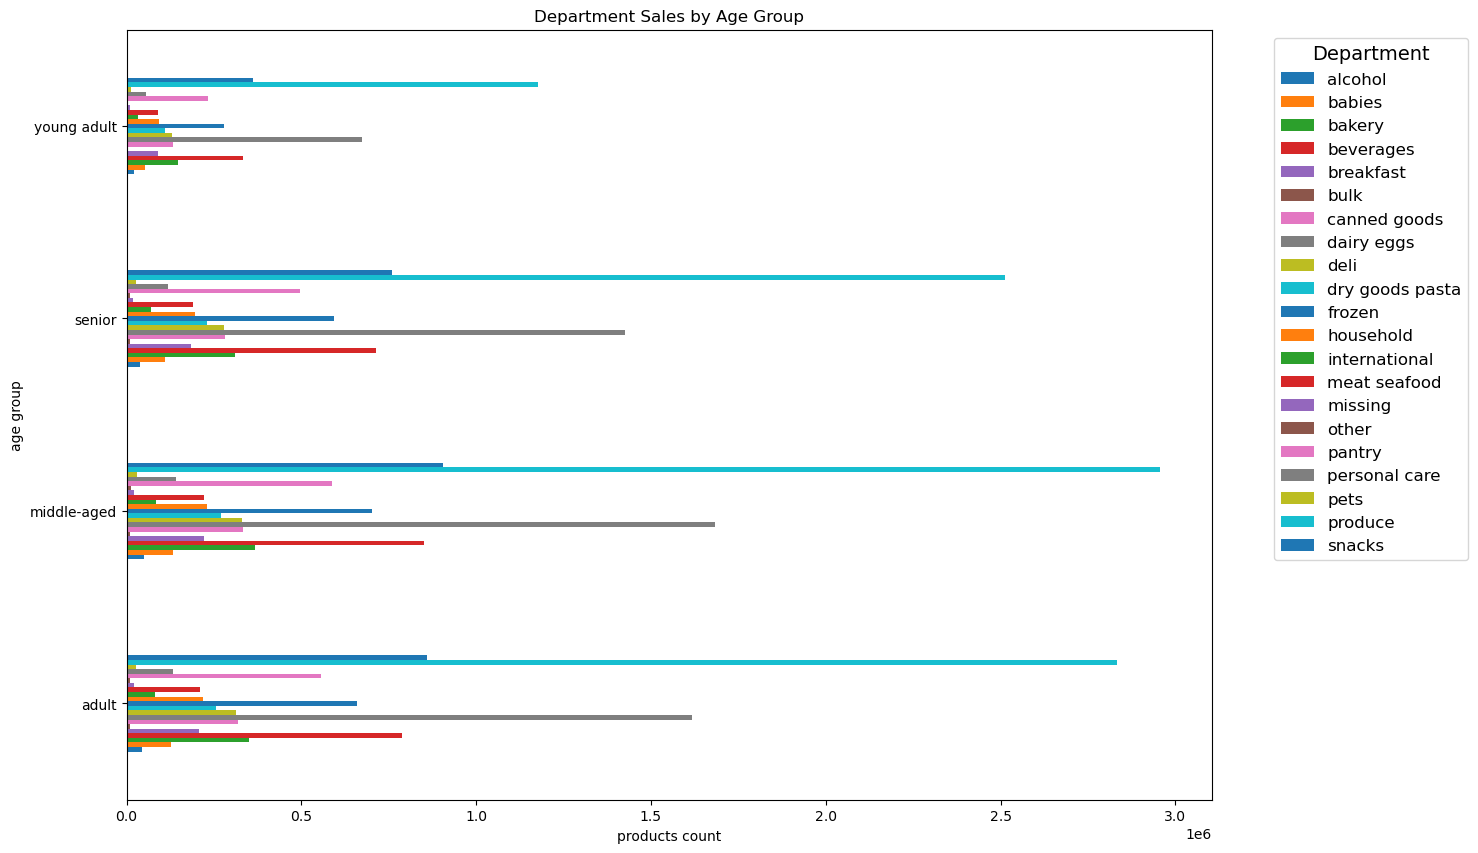

In [55]:
# bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [56]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

## Income vs Department

In [57]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24953,54433,154040,325093,86853,3773,138733,684241,130995,111248,...,96776,34283,95722,8738,4749,242268,56053,13514,1179115,316968
low-income,24324,45598,154056,506792,123852,6226,122799,721677,151289,100274,...,120045,32567,58660,9760,5334,243175,67793,12664,1210629,711874
middle-income,104419,323771,864332,1856238,492328,24574,806526,3992829,768965,655105,...,521845,202403,554545,50647,26208,1389926,323726,71538,7089547,1858708


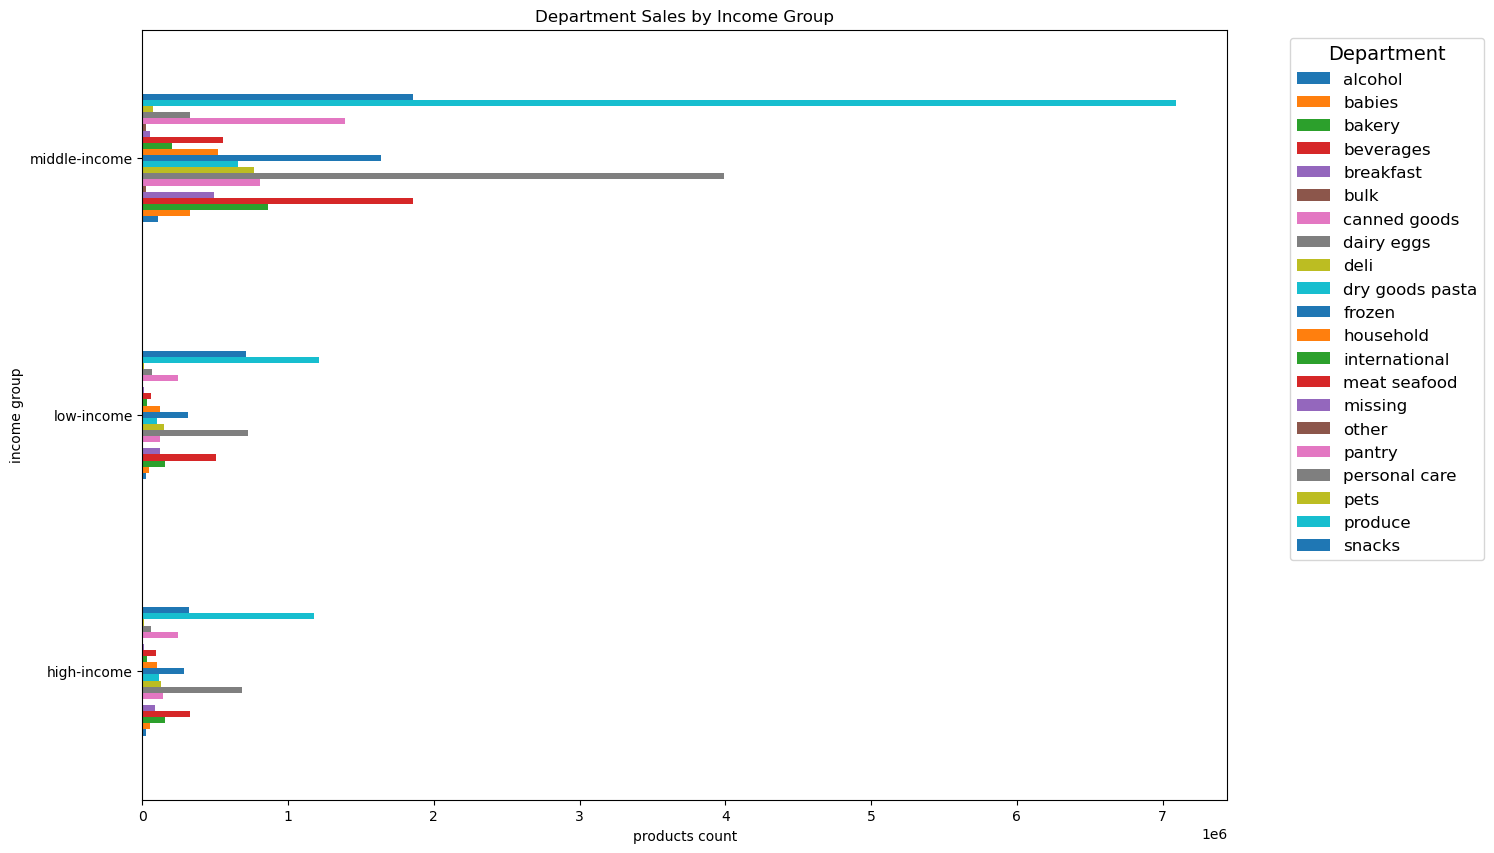

In [59]:
# bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [60]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

## Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [64]:
df_final_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Number of Dependents,Family Status,Income,Region,Activity_flag,age_group,income_group,dependants_flag,department,created
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,High-activity customer,adult,low-income,has dependants,beverages,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,High-activity customer,adult,low-income,has dependants,dairy eggs,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,3,married,40423,South,High-activity customer,adult,low-income,has dependants,snacks,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,High-activity customer,adult,low-income,has dependants,snacks,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,High-activity customer,adult,low-income,has dependants,household,both


In [74]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final_merged.groupby(['user_id', 'Gender', 'State', 'Region', 'Number of Dependents', 'Family Status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag','Activity_flag', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [75]:
customer_profile.head()

,user_id,Gender,State,Region,Number of Dependents,Family Status,age_group,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,Activity_flag,dependants_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,High-activity customer,has dependants,low-income,Low spender,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,High-activity customer,has dependants,low-income,Low spender,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,High-activity customer,has dependants,low-income,Low spender,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,High-activity customer,has dependants,low-income,Low spender,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,High-activity customer,has dependants,low-income,Low spender,57.0


In [76]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [77]:
customer_agg

order_number           prices                  
                 max min  mean    max   min        mean
user_id                                                
1                 10   1   5.5   63.1  25.0   37.570000
2                 14   1   7.5  213.1  19.0  104.685714
3                 12   1   6.5  107.2  30.7   60.116667
4                  5   1   3.0   63.4  10.8   29.540000
5                  4   1   2.5  118.4  43.6   85.000000
...              ...  ..   ...    ...   ...         ...
206205             3   1   2.0  149.1  51.6   95.033333
206206            67   1  34.0  157.3   9.6   32.526866
206207            16   1   8.5  200.8  42.8  101.931250
206208            49   1  25.0  238.5  38.7  115.595918
206209            13   1   7.0  131.5  11.1   70.046154

[198123 rows x 6 columns]

In [78]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [79]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
5                  4   1   2.486486                   19.0  10.0  14.500000
...              ...  ..        ...                    ...   ...        ...
206205             3   1   1.687500                   30.0  10.0  20.666667
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[206209 rows x 6 columns]

# Compare customer profiles with regions and departments

## Region vs Department

In [81]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['Region'], df_final_merged['department'], dropna = False)

In [82]:
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,21320,58688,163034,380449,96776,4615,145346,742431,146250,118123,...,102104,36992,96230,9632,5183,257511,61690,13804,1295707,400885
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814
NaN,5222,16451,45565,102969,26798,1187,41409,211595,40567,33693,...,29381,9899,28390,2742,1402,71934,17125,4797,370132,113790


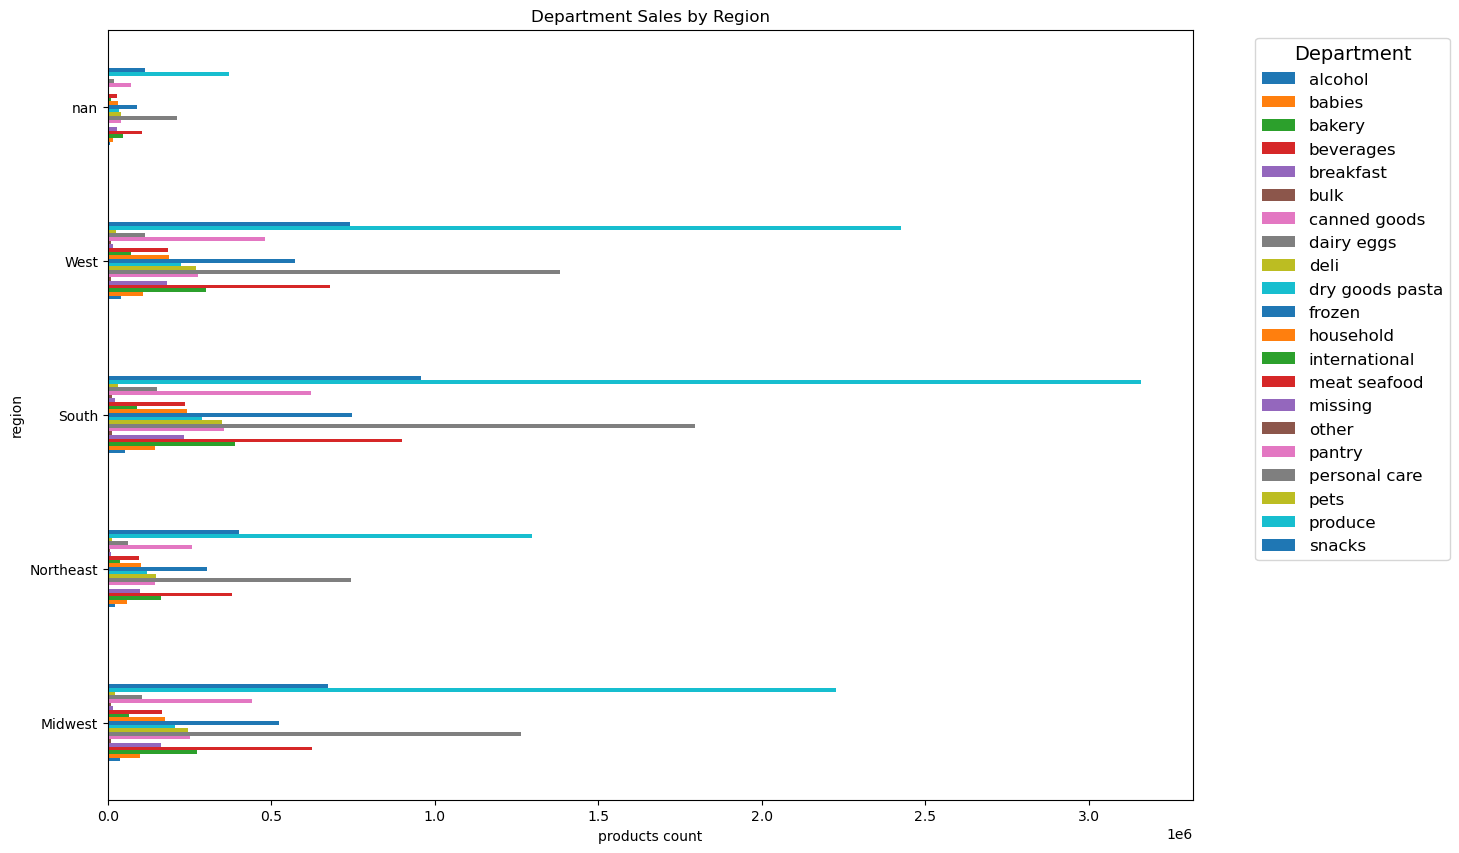

In [83]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [84]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

In [85]:
# import orders_products_customers
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

Text(0.5, 0, '')

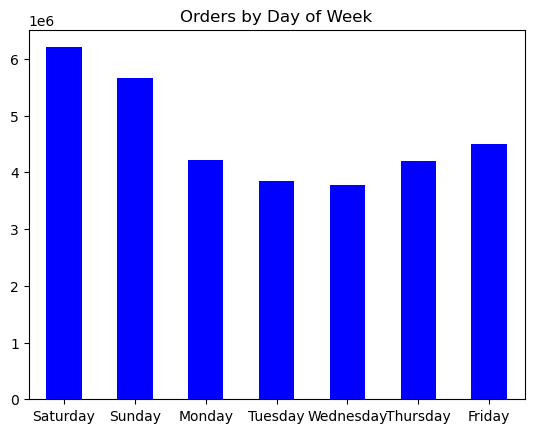

In [86]:
# bar chart orders by day of week
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [87]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

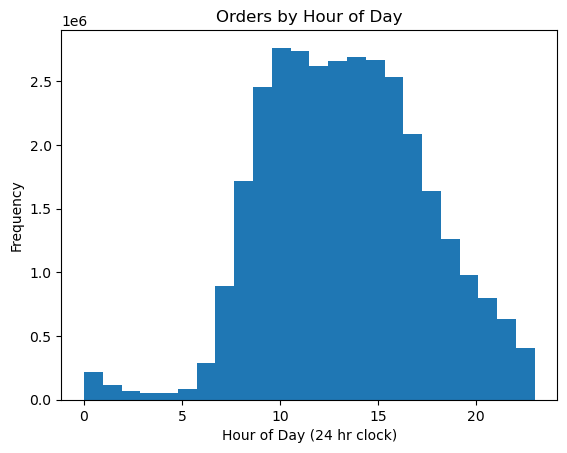

In [88]:
# histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [89]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [90]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1310941,1381467,7591685
New customer,731578,1086401,4426011
Regular customer,2008321,2272117,11596338


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

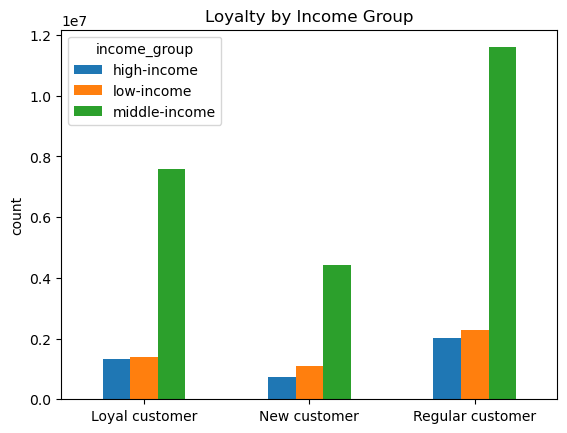

In [91]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [92]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [96]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

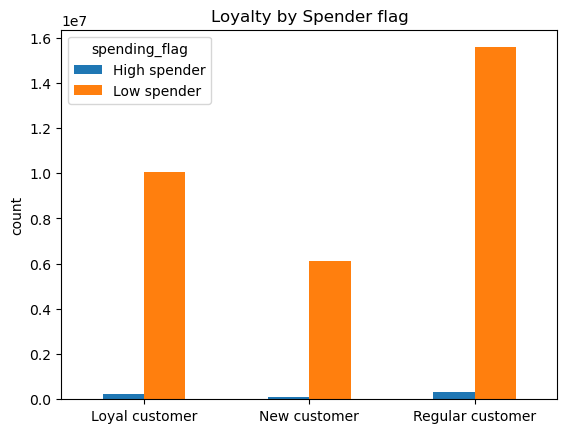

In [97]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [98]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [103]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['Family Status'], dropna = False)
loyalty_fam_cross

Family Status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,530322,291210,4393693,1028765
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

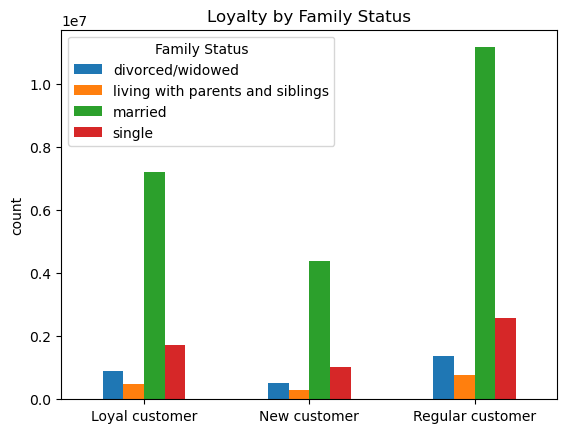

In [104]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [105]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,4684903,1559087
Regular customer,11927204,3949572


In [112]:
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_family_status.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

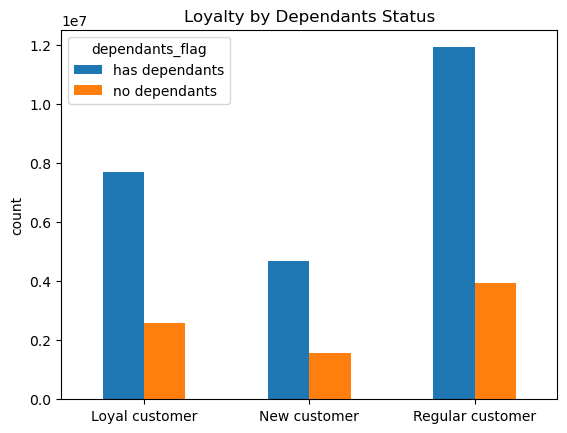

In [106]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [114]:
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_depend_bar.png'))

In [108]:
# Check value counts
fam_status = df['Family Status'].value_counts(dropna = False)
fam_status

Family Status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

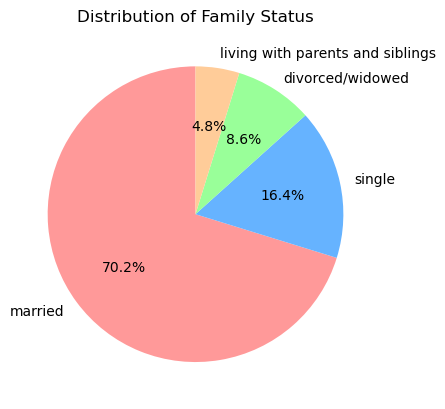

In [109]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [110]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))